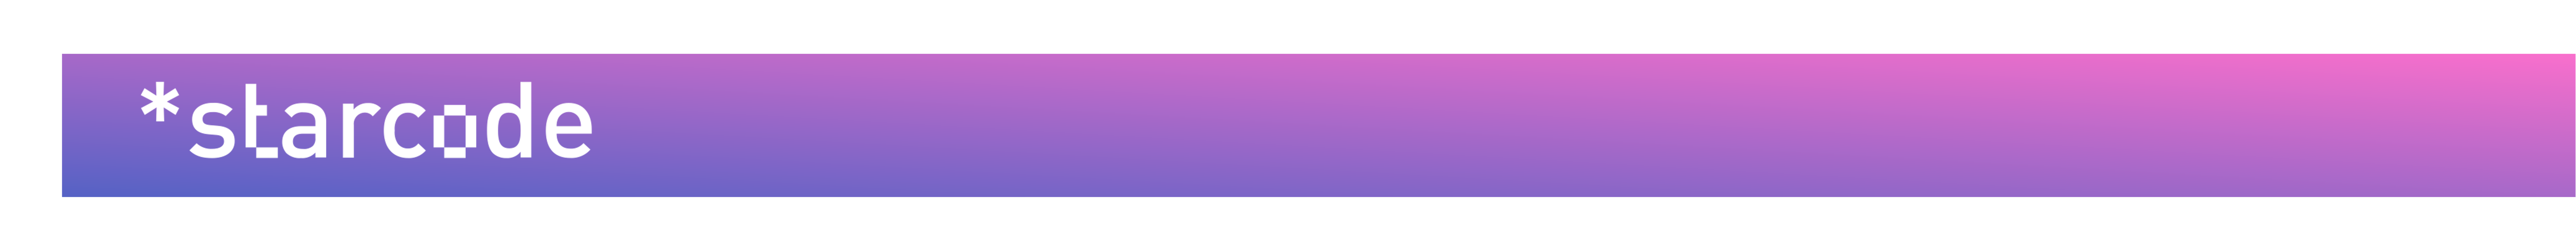


# **<span style="color: #6162C5;">Künstliche Intelligenz mit Python</span>  <span style="color: #7865C6;"> - Woche 07: Entscheidungsbäume (Lösung) </span>** &nbsp; [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/starcodecourses/Python-KI/PythonKI-V2?labpath=_starcode_Pythonkurs_10_L%C3%B6sungen.ipynb)

In den letzten Wochen haben wir ein paar grundlegende KI-Algorithmen in Python kennengelernt. Dabei haben wir zwei sehr zentrale Arten von Algorithmen benutzt: Regressionsalgorithmen und Klassifikationsalgorithmen. Heute werden wir uns mit einem Algorithmus, der beide Problemklassen, also Klassifikation und Regression, in einer für uns Menschen sehr einfachen, verständlichen Weise angeht.

Zuerst importieren wir wieder die benötigte Bibliothek scikit-learn:


In [ ]:
! pip install matplotlib scikit-learn


## <span style="color: #9C68C8;">Was sind Entscheidungsbäume?</span>

Ein Entscheidungsbaum repräsentiert eine Abfolge von Entscheidungen, die auf den Eigenschaften eines Datensatzes basieren und uns helfen, Daten einzuteilen. Man kann sich einen Entscheidungsbaum wie eine Befragung vorstellen. Wenn wir etwas über unseren Datenpunkt vorhersagen wollen (etwa, ob ein Planet bewohnbar ist, mehr dazu gleich), stellen wir einfach eine Reihe von Fragen an unseren Datenpunkt. Basierend auf den Antworten, die wir für unsere Fragen bekommen, treffen wir dann irgendwann eine endgültige Entscheidung.

Nun zum konreten Beispiel: Versetzten wir uns wieder in das Szenario, in dem du eine renommierte Astronomin bist, die das Entdecken von Planeten zu ihrem Beruf gemacht hat! In der letzten Woche hast du die neuen Planeten, die du entdeckt hast, einem Sonnensystem zugeordnet. Nun willst du bestimmen, ob diese Planeten für Leben geeignet sein könnten. Ein (stark vereinfachter) Entscheidungsbaum dazu könnte wie folgt aussehen:

<center>
<img src="https://cdn.githubraw.com/starcodecourses/Python-KI/PythonKI-V2/_starcode_Pythonkurs_Visuals/entscheidungsbaum.png" width="700"/>
</center>

**<span style="color: #EB6ECB;">Aufgabe 7.1:</span>** *Implementiere den Entscheidungsbaum mithilfe von If-Else Klauseln. Vervollständige dazu den unten stehenden Code.*



In [1]:
# Musterlösung

richtiger_abstand_zur_sonne = True
atmosphäre = True
magnetfeld = True

if richtiger_abstand_zur_sonne:
    if atmosphäre:
        if magnetfeld:
            print('Der Planet hat günstige Bedingungen für Leben.')
        else:
            print('Leben wie wir es kennen ist unwahrscheinlich.')
    else:
        print('Ohne ein Magnetfeld ist der Planet anfällig für Sonnenwinde und Leben ist unwahrscheinlich')
else:
    print('Leben könnte es aufgrund extremer Temperaturen schwierig haben')

Der Planet hat günstige Bedingungen für Leben.



## <span style="color: #9C68C8;">Entscheidungsbäume zur Klassifikation</span>

In dem obigen Entscheidungsbaum werden die Planeten in zwei Klassen unterteilt: lebensfreundliche und nicht lebensfreundliche Planeten. Daher - wer hätte es gedacht - handelt es sich dabei um ein Klassifikationsproblem. Da ihr wahrscheinlich gemerkt habt, dass das Ganze sehr arbeitsaufwendig ist, wenn man es selber macht, werden wir uns jetzt anschauen, wie man den ganzen Prozess automatisieren kann. 

Einer der großen Vorteile von Entscheidungsbäumen ist, dass der Entscheidungsprozess zur Klassifikation in ein von Menschen lesbares Format gebracht wird. Unser aktuelles Beispiel hat ja nur zwei Antwortmöglichkeiten: 'Ja' oder 'Nein'. Denken wir aber an unseren Algorithmus aus der letzten Woche zurück, wo wir verschiedene Arten von Schwertlilien identifizieren wollten:

<center><img src="https://cdn.githubraw.com/starcodecourses/Python-KI/PythonKI-V2/_starcode_Pythonkurs_Visuals/iris_dataset.png" width="1000" /></center> 

<center> <span style="color: #808080;"><i> Bildquellen: 
<a href="https://en.wikipedia.org/wiki/Iris_setosa#/media/File:Irissetosa1.jpg">Iris Sestosa</a>, <a href="https://en.wikipedia.org/wiki/Iris_versicolor#/media/File:Blue_Flag,_Ottawa.jpg">Iris Versicolor</a>, <a href="https://en.wikipedia.org/wiki/Iris_virginica#/media/File:Iris_virginica_2.jpg">Iris Virginica</a>.</i></span> </center>

Um die Entscheidung zu treffen, zu welcher Klasse unsere Pflanze gehört, haben wir uns die Breite und die Länge der Blütenblätter angeschaut. Für diese Werte gibt es nicht nur zwei, sondern unendlich viele Möglichkeiten. Um zu versuchen unsere Klassifikation genauer zu machen, könnten wir noch andere Eigenschaften mit in Betracht ziehen: Größe der Blätter oder der Pflanze, Farbe der Blüte, Anzahl Blütenblätter, ...

Das Problem? Wie ihr ja wisst, können wir unsere zwei Eigenschaften in einem zweidimensionalen Plot mit 2 Achsen darstellen, drei Eigenschaften in einem dreidimensionalen Plot mit drei Achsen, und dann? Dann können wir unsere Daten nur noch in mehrere Plots aufteilen. Natürlich ist das nicht unmöglich, aber das Ganze wird sehr schnell unübersichtlich und schwer zu verstehen. In diesem Fall sind Entscheidungsbäumen sehr hilfreich!

Letzte Woche waren wir ein bisschen unpräzise. Wir haben zwar behauptet, dass wir die Breite und Länge der Blütenblätter angeschaut haben. Allerdings wäre es genauer zu sagen, dass wir uns die [Kronblätter](https://de.wikipedia.org/wiki/Kronblatt) angeschaut haben. Das ist nämlich nur ein bestimmter Teil der Blüte. Als Beispiel wollen wir noch die Länge und Breite eines weiteren Teils der Blüte anschauen: der [Kelchblätter](https://de.wikipedia.org/wiki/Kelchblatt). 

Wir schauen uns zunächst mal an, wie diese Daten voneinander abhängen:



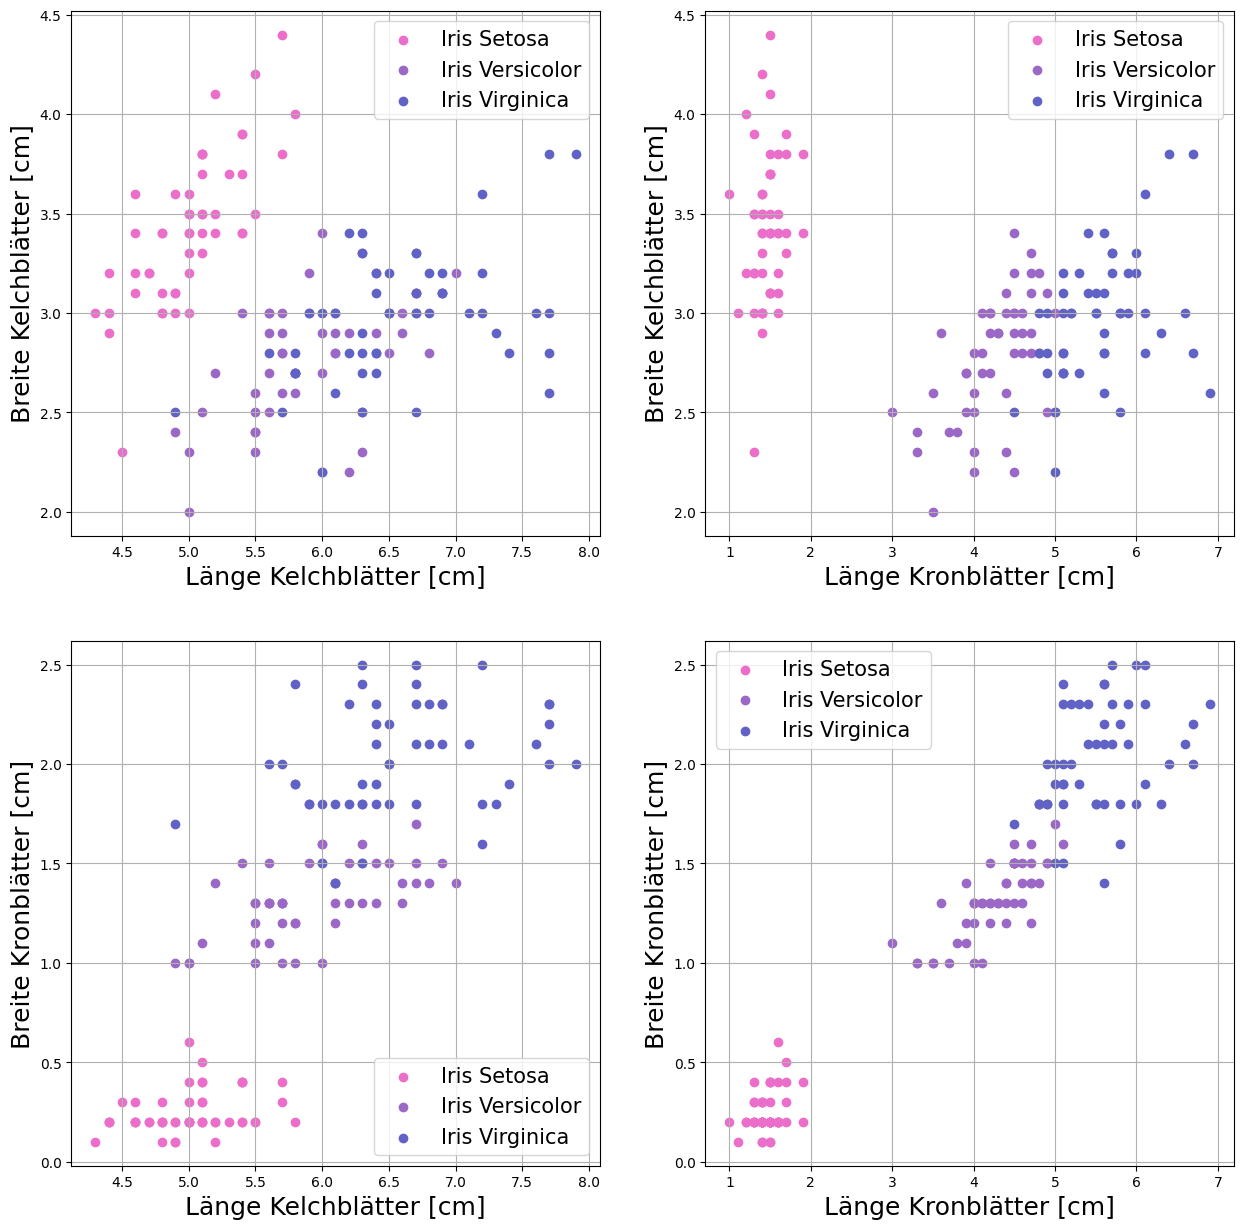

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
blüten_maße = iris.data
pflanzenart = iris.target

import matplotlib.pyplot as plt

name_pflanzenart = ['Iris Setosa', 'Iris Versicolor', 'Iris Virginica']
kelchblätter_länge  = blüten_maße[:,0].T # in cm
kelchblätter_breite = blüten_maße[:,1].T # in cm
kronblätter_länge   = blüten_maße[:,2].T # in cm
kronblätter_breite  = blüten_maße[:,3].T # in cm

farben = ['#EB6ECB', '#9C68C8', '#6162C5']
plt.figure(figsize=(15,15))

plt.subplot(221)
plt.grid(True)
for i in range(3):
    plt.scatter(kelchblätter_länge[pflanzenart==i], kelchblätter_breite[pflanzenart==i], label=name_pflanzenart[i], c=farben[i])
plt.legend(fontsize=15)
plt.xlabel('Länge Kelchblätter (cm)', fontsize=18)
plt.ylabel('Breite Kelchblätter (cm)', fontsize=18)

plt.subplot(222)
plt.grid(True)
for i in range(3):
    plt.scatter(kronblätter_länge[pflanzenart==i], kelchblätter_breite[pflanzenart==i], label=name_pflanzenart[i], c=farben[i])
plt.legend(fontsize=15)
plt.xlabel('Länge Kronblätter (cm)', fontsize=18)
plt.ylabel('Breite Kelchblätter (cm)', fontsize=18)

plt.subplot(223)
plt.grid(True)
for i in range(3):
    plt.scatter(kelchblätter_länge[pflanzenart==i], kronblätter_breite[pflanzenart==i], label=name_pflanzenart[i], c=farben[i])
plt.legend(fontsize=15)
plt.xlabel('Länge Kelchblätter (cm)', fontsize=18)
plt.ylabel('Breite Kronblätter (cm)', fontsize=18)

plt.subplot(224)
plt.grid(True)
for i in range(3):
    plt.scatter(kronblätter_länge[pflanzenart==i], kronblätter_breite[pflanzenart==i], label=name_pflanzenart[i], c=farben[i])
plt.legend(fontsize=15)
plt.xlabel('Länge Kronblätter (cm)', fontsize=18)
plt.ylabel('Breite Kronblätter (cm)', fontsize=18)

plt.show()


🔎 <span style="color: #2E88B6;"> Der Befehl `plt.subplot()` wird benutzt, um mehrere Plots in ein Bild zu kombinieren. Wenn du mehr darüber erfahren willst, kannst du in das [Bonusmaterial zu Woche 5](https://mybinder.org/v2/gh/starcodecourses/Python-KI/PythonKI-V2?labpath=_starcode_Pythonkurs_05.ipynb) oder in der [entsprechenden Dokumentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html) nachschauen. </span>

Wir können diese 4 Eigenschaften, also Länge und Breite der Kelch- und Kronblätter, nutzen, um einen Entscheidungsbaum zu trainieren. Dazu importieren wir zunächst den `DecisionTreeClassifier` von Scikit-learn:



In [3]:
from sklearn.tree import DecisionTreeClassifier


Wie zuvor in den von uns verwendeten Scikit-learn Modellen müssen wir das Modell definieren und daraufhin das Modell trainieren:



In [4]:
entscheidungsbaum_modell = DecisionTreeClassifier(random_state=42)
 
entscheidungsbaum_modell.fit(blüten_maße,pflanzenart)

DecisionTreeClassifier(random_state=42)


🔎 <span style="color: #2E88B6;"> Der Parameter `random_state` im Modell sorgt dafür, dass der normalerweise zufällige Algorithmus jedes Mal gleich verläuft. Stellt euch zum Beispiel vor, dass ihr 3-mal einen Würfel werft. Wollt ihr immer dasselbe Ergebnis, so könntet ihr den Parameter auf die entsprechende Zahl (den `random_state`) festlegen und dann immer das Ergebnis 3,2 und 6 erhalten. Wird der Parameter allerdings auf eine andere Zahl gesetzt, dann würfelt ihr immer eine andere Kombination von Zahlen (zum Beispiel 2, 2 und 1). </span>

Wie zuvor kann die Methode `.predict()` verwendet werden, um die Klasse einer neuen Messung vorherzusagen. Was uns allerdings bei diesem Algorithmus besonders interessiert, ist der Entscheidungsbaum, der durch den Algorithmus festgelegt wird. Diesen können wir in Textformat durch den Befehl `export_text` ausgeben. Um das Ganze leserlich zu gestalten, können wir noch den Namen unserer Eigenschaften und Kategorien als Parameter eingeben (`feature_names=blüten_maße_label, class_names=pflanzenart_label`):



In [5]:
from sklearn.tree import export_text

blüten_maße_label = ['Länge Kelchblätter', 'Breite Kelchblätter', 'Länge Kronblätter', 'Länge Kronblätter']
pflanzenart_label = ['Iris Setosa', 'Iris Versicolor', 'Iris Virginica']

text = export_text(entscheidungsbaum_modell, feature_names=blüten_maße_label, class_names=pflanzenart_label)
print(text)

|--- Länge Kronblätter <= 2.45
|   |--- class: Iris Setosa
|--- Länge Kronblätter >  2.45
|   |--- Länge Kronblätter <= 1.75
|   |   |--- Länge Kronblätter <= 4.95
|   |   |   |--- Länge Kronblätter <= 1.65
|   |   |   |   |--- class: Iris Versicolor
|   |   |   |--- Länge Kronblätter >  1.65
|   |   |   |   |--- class: Iris Virginica
|   |   |--- Länge Kronblätter >  4.95
|   |   |   |--- Länge Kronblätter <= 1.55
|   |   |   |   |--- class: Iris Virginica
|   |   |   |--- Länge Kronblätter >  1.55
|   |   |   |   |--- Länge Kronblätter <= 5.45
|   |   |   |   |   |--- class: Iris Versicolor
|   |   |   |   |--- Länge Kronblätter >  5.45
|   |   |   |   |   |--- class: Iris Virginica
|   |--- Länge Kronblätter >  1.75
|   |   |--- Länge Kronblätter <= 4.85
|   |   |   |--- Länge Kelchblätter <= 5.95
|   |   |   |   |--- class: Iris Versicolor
|   |   |   |--- Länge Kelchblätter >  5.95
|   |   |   |   |--- class: Iris Virginica
|   |   |--- Länge Kronblätter >  4.85
|   |   |   |--- c


Cool, oder? Haben wir jetzt einen neuen Datenpunkt, können wir nun ganz einfach diesen Baum entlanggehen und schauen, ob die abgefragte Eigenschaft größer (`>`) oder kleiner (`<`) als die genannte Zahl ist und dann entsprechend im Baum fortfahren, bis man zur vorhergesagten Klasse kommt. 

Das Ganze kann mithilfe des Befehls `plot_tree` aber sogar noch übersichtlicher grafisch gestaltet werden: 



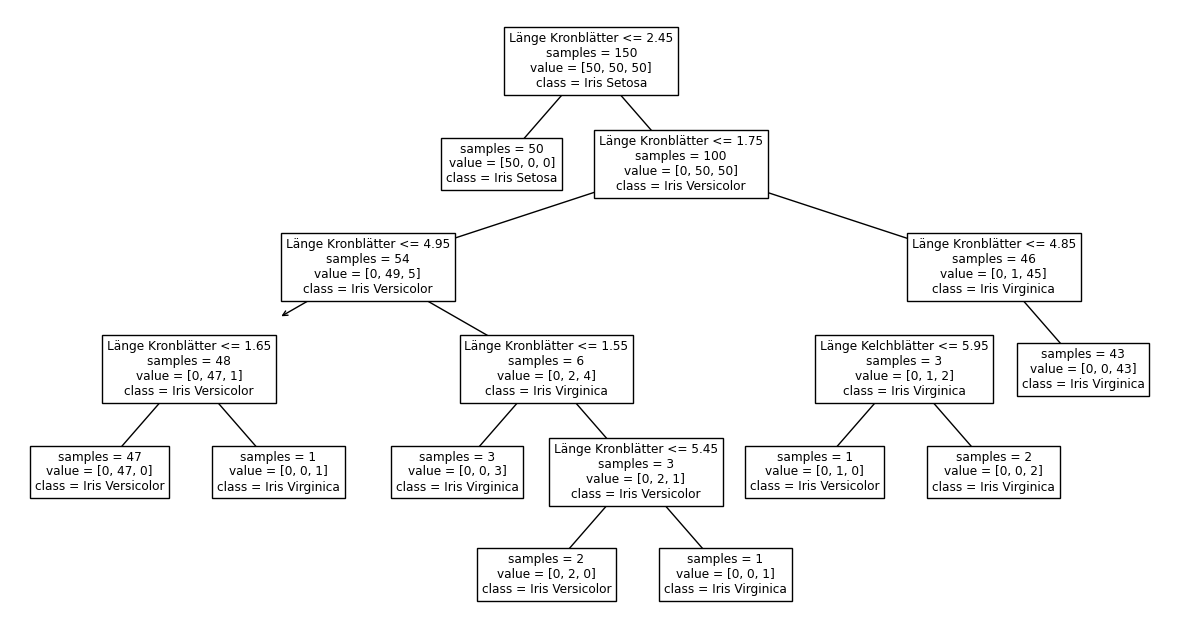

In [6]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15,8))
text = export_text(entscheidungsbaum_modell, feature_names=blüten_maße_label, class_names=pflanzenart_label)

plot_tree(entscheidungsbaum_modell,feature_names=blüten_maße_label,class_names=pflanzenart_label, impurity=False)
plt.show()


🔎 <span style="color: #2E88B6;"> Der Parameter `impurity=False` versteckt nur ein paar Informationen, die uns im Moment nicht interessieren. </span>

Startet man nun ganz oben im Baum, so muss man die Entscheidung "`Länge Kronblätter <= 2.45`" treffen. Ist diese Bedingung nicht erfüllt (also `Länge Kronblätter > 2.45`), dann biegt man in der nächsten Ebene nach links ab und gerät direkt an einen Endpunkt, der vorhersagt, dass es sich um die Blumenart `Iris Setosa` handelt. Ist die Bedingung allerdings erfüllt, dann gerät man gleich zu der nächsten Entscheidung `Länge Kronblätter <= 1.75`. So fährt man dann fort, bis man an einem der Endpunkte des Baumes angekommen ist!

Wir können die Regionen der Klassifikation auch in unsere Graphen von oben einfügen. Dazu nutzen wir den Befehl `DecisionBoundaryDisplay.from_estimator()`. Den entsprechenden Code müsst ihr gar nicht im Detail verstehen, da für uns das Ergebnis nur da ist, um ein Gefühl dazu zu kriegen, wie dieser Algorithmus funktioniert.



Text(0, 0.5, 'Breite Kronblätter [cm]')

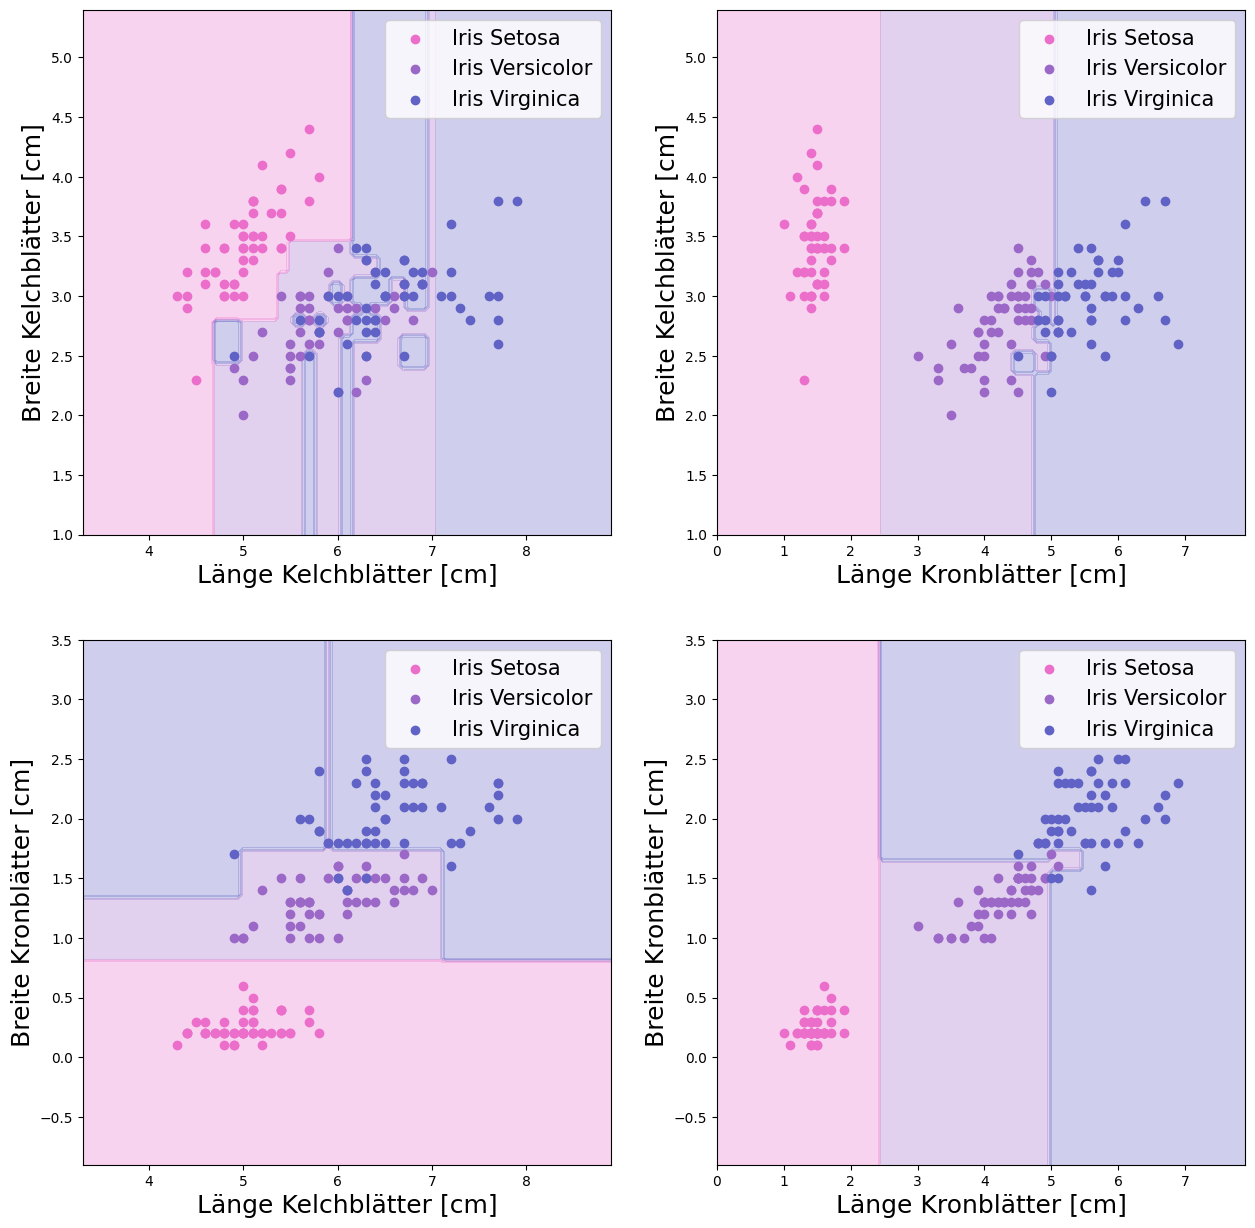

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.colors import ListedColormap # Diesen Befehl nutzen wir um unsere gewünschten Farben zu erhalten

farben = ['#EB6ECB', '#9C68C8', '#6162C5']
plt.figure(figsize=(15,15))

ax1 = plt.subplot(221)

model1 = DecisionTreeClassifier(random_state=42)
model1.fit(blüten_maße[:,[0,1]],pflanzenart)
DecisionBoundaryDisplay.from_estimator(model1,
                                       blüten_maße[:,[0,1]],
                                       cmap=ListedColormap(farben),
                                       response_method="predict",
                                       ax=ax1, alpha=.3)
for i in range(3):
    plt.scatter(kelchblätter_länge[pflanzenart==i], kelchblätter_breite[pflanzenart==i], label=name_pflanzenart[i], c=farben[i])
plt.legend(fontsize=15)
plt.xlabel('Länge Kelchblätter (cm)', fontsize=18)
plt.ylabel('Breite Kelchblätter (cm)', fontsize=18)

ax2 = plt.subplot(222)
model2 = DecisionTreeClassifier(random_state=42)
model2.fit(blüten_maße[:,[2,1]],pflanzenart)
DecisionBoundaryDisplay.from_estimator(model2,
                                       blüten_maße[:,[2,1]],
                                       cmap=ListedColormap(farben),
                                       response_method="predict",
                                       ax=ax2, alpha=.3)
for i in range(3):
    plt.scatter(kronblätter_länge[pflanzenart==i], kelchblätter_breite[pflanzenart==i], label=name_pflanzenart[i], c=farben[i])
plt.legend(fontsize=15)
plt.xlabel('Länge Kronblätter (cm)', fontsize=18)
plt.ylabel('Breite Kelchblätter (cm)', fontsize=18)

ax3 = plt.subplot(223)
model3 = DecisionTreeClassifier(random_state=42)
model3.fit(blüten_maße[:,[0,3]],pflanzenart)
DecisionBoundaryDisplay.from_estimator(model3,
                                       blüten_maße[:,[0,3]],
                                       cmap=ListedColormap(farben),
                                       response_method="predict",
                                       ax=ax3, alpha=.3)
for i in range(3):
    plt.scatter(kelchblätter_länge[pflanzenart==i], kronblätter_breite[pflanzenart==i], label=name_pflanzenart[i], c=farben[i])
plt.legend(fontsize=15)
plt.xlabel('Länge Kelchblätter (cm)', fontsize=18)
plt.ylabel('Breite Kronblätter (cm)', fontsize=18)

ax4 = plt.subplot(224)
model4 = DecisionTreeClassifier(random_state=42)
model4.fit(blüten_maße[:,[2,3]],pflanzenart)
DecisionBoundaryDisplay.from_estimator(model4,
                                       blüten_maße[:,[2,3]],
                                       cmap=ListedColormap(farben),
                                       response_method="predict",
                                       ax=ax4, alpha=.3)
for i in range(3):
    plt.scatter(kronblätter_länge[pflanzenart==i], kronblätter_breite[pflanzenart==i], label=name_pflanzenart[i], c=farben[i])
plt.legend(fontsize=15)
plt.xlabel('Länge Kronblätter (cm)', fontsize=18)
plt.ylabel('Breite Kronblätter (cm)', fontsize=18)

plt.show()


🔎 <span style="color: #2E88B6;"> Aufgrund der Eigenschaften von `DecisionBoundaryDisplay.from_estimator()` muss hier leider für jeden Graphen der Entscheidungsbaum neu trainiert werden. </span>

Ganz genauso wie für die Klassifikation, die wir gerade gesehen haben, kann dieser Algorithmus auch eine Regressionsaufgabe lösen. Dabei stehen dann an den Enden des Entscheidungsbaums allerdings Zahlenwerte und keine Klassen.




## <span style="color: #9C68C8;">Zusammenfassung</span>

Wir haben uns heute angeschaut, wie man automatische, von Menschen einfach lesbare Entscheidungsbäume zur Klassifikation anwenden kann. Diese Algorithmen sind besonders nützlich, wenn deine Daten viele, nicht zu komplexe Eigenschaften haben. Der Algorithmus erstellt daraufhin eine Reihe von Abfragen, um die Vorhersage zu machen.

Nun bist du aber dran:

**<span style="color: #EB6ECB;">Aufgabe Z10:</span>** *Erstelle deinen eigenen Entscheidungsbaum mithilfe von Scikit-learn und trainiere ihn auf den unten stehenden Daten. Das Objekt `eigenschaften` besteht aus Listen mit 3 Zahlen, die jeweils für die 'ja' (also `1`) oder 'nein' (oder `0`) Entscheidung im Baum vom Anfang der Stunde stehen:*
<center>
<img src="https://cdn.githubraw.com/starcodecourses/Python-KI/PythonKI-V2/_starcode_Pythonkurs_Visuals/entscheidungsbaum.png" width="500"/>
</center>

*Nutze dann `plot_tree`, um dir den Entscheidungsbaum anzeigen zu lassen. Ist das Ergebnis wie erwartet? Nutze `random_state=42`, um deine Lösung mit der Musterlösung vergleichen zu können.*



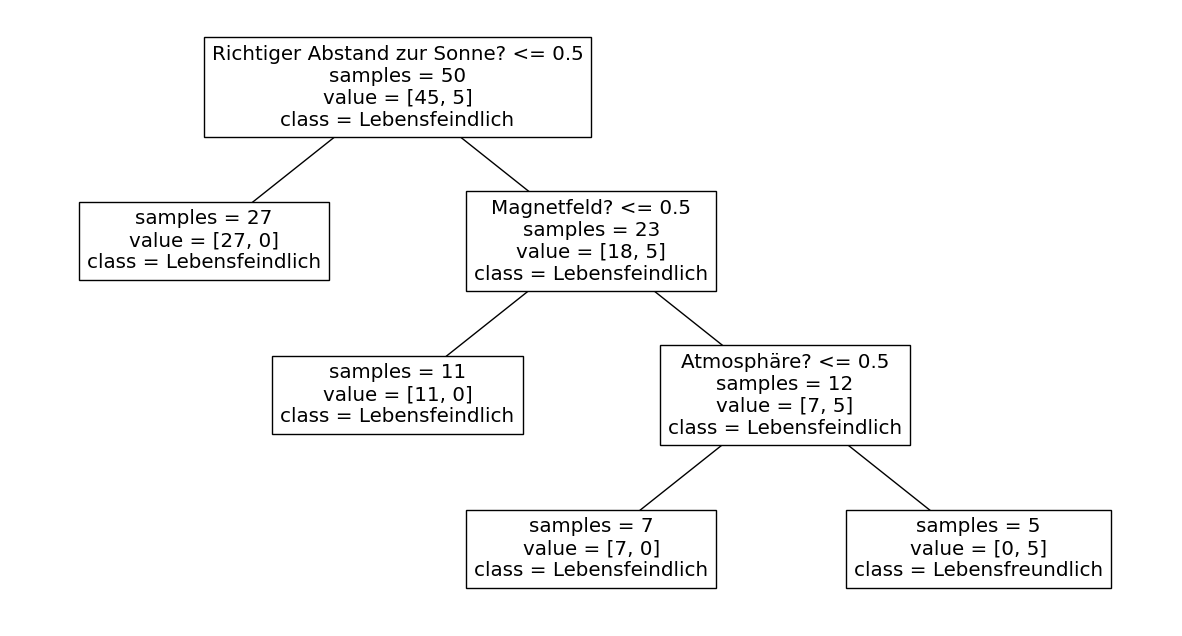

In [8]:
# Musterlösung

eigenschaften = [[0, 0, 0], [1, 0, 1], [1, 1, 1], [0, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 0], [0, 0, 1], [0, 0, 0], [1, 0, 0], [0, 0, 0], [1, 0, 0], [1, 1, 0], [0, 1, 0], [0, 1, 1], [0, 0, 1], [0, 0, 0], [0, 0, 1], [1, 1, 1], [0, 1, 0], [1, 0, 1], [0, 0, 0], [0, 0, 1], [0, 0, 0], [1, 0, 1], [1, 1, 0], [1, 0, 0], [1, 1, 1], [0, 1, 1], [0, 1, 1], [1, 1, 0], [0, 1, 1], [0, 1, 1], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 0, 0], [1, 0, 1], [0, 0, 0], [1, 0, 1], [0, 0, 0], [1, 1, 0], [1, 0, 1], [0, 1, 0], [0, 1, 1], [1, 1, 0], [0, 1, 0], [0, 0, 1], [1, 1, 0], [1, 1, 1]]
klasse        = [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

eigenschaften_namen = ['Richtiger Abstand zur Sonne?', 'Atmosphäre?', 'Magnetfeld?']
klasse_namen        = ['Lebensfeindlich', 'Lebensfreundlich']

modell = DecisionTreeClassifier(random_state=42)
 
modell.fit(eigenschaften, klasse)

from sklearn.tree import plot_tree

plt.figure(figsize=(15,8))
plot_tree(modell,
          feature_names=eigenschaften_namen,
          class_names=klasse_namen, impurity=False)
plt.show()


## <span style="color: #9C68C8;">Ein bisschen Theorie: Überwachtes Lernen vs. unüberwachtes Lernen</span>

Eine wichtige Kategorisierung, anhand derer man KI-Algorithmen einteilen kann, haben wir schon kennengelernt: Klassifikation und Regression.

Es gibt allerdings noch eine weitere Kategorisierung, in die sich die Algorithmen einteilen lassen:
*überwachtes Lernen* (englisch "supervised learning") und *unüberwachtes Lernen* (englisch "unsupervised learning").

Beim überwachten Lernen wissen wir von den Daten, auf denen wir den Algorithmus trainieren, bereits die "Antwort", also zum Beispiel bei der Klassifikation die Klasse, zu der jeder Datenüunkt tatsächlich gehört. Das ist sehr praktisch, weil wir dann damit unseren Algorithmus "trainieren" können: Wir können ihn die Klasse für jeden Datenpunkt vorhersagen lassen, und dann gucken, ob er jeweils richtig oder falsch lag. Wenn er falsch lag, können wir ihmd as als "Feedback" sagen, sodass er es beim nächsten Mal vielleicht besser machen kann.

Dem gegenüber steht das unüberwachte Lernen. Schauen wir uns hier wieder das Beispiel der Klassifikation an: In diesem Fall wissen wir nicht, welcher Klasse die Datenpunkte, auf denen wir den Algorithmus trainieren, jeweils angehören. Trotzdem können wir uns die Datenpunkte genau anschauen und darauf Regelmäßigkeiten erkennen, die für uns interessant sind.

Als Beispiel schauen wir uns die Abbildungen unten an:
Auf der linken Seite sind unsere Datenpunkte in einem 2D-Graph abgebildet. Wir wissen die Klassen der Datenpunkte nicht, können sie aber mit unüberwachtem Lernen herausfinden. Das sieht man auf der rechten Seite: Euch ist vielleicht schon aufgefallen, dass die Datenpunkte "Haufen" bilden (englisch "cluster"). Ein KI-Algorithmus kann jetzt zum Beispiel diese Haufen erkennen und schlussfolgern, dass alle Datenpunkte in diesem Haufen zu einer Klasse gehören müssen.

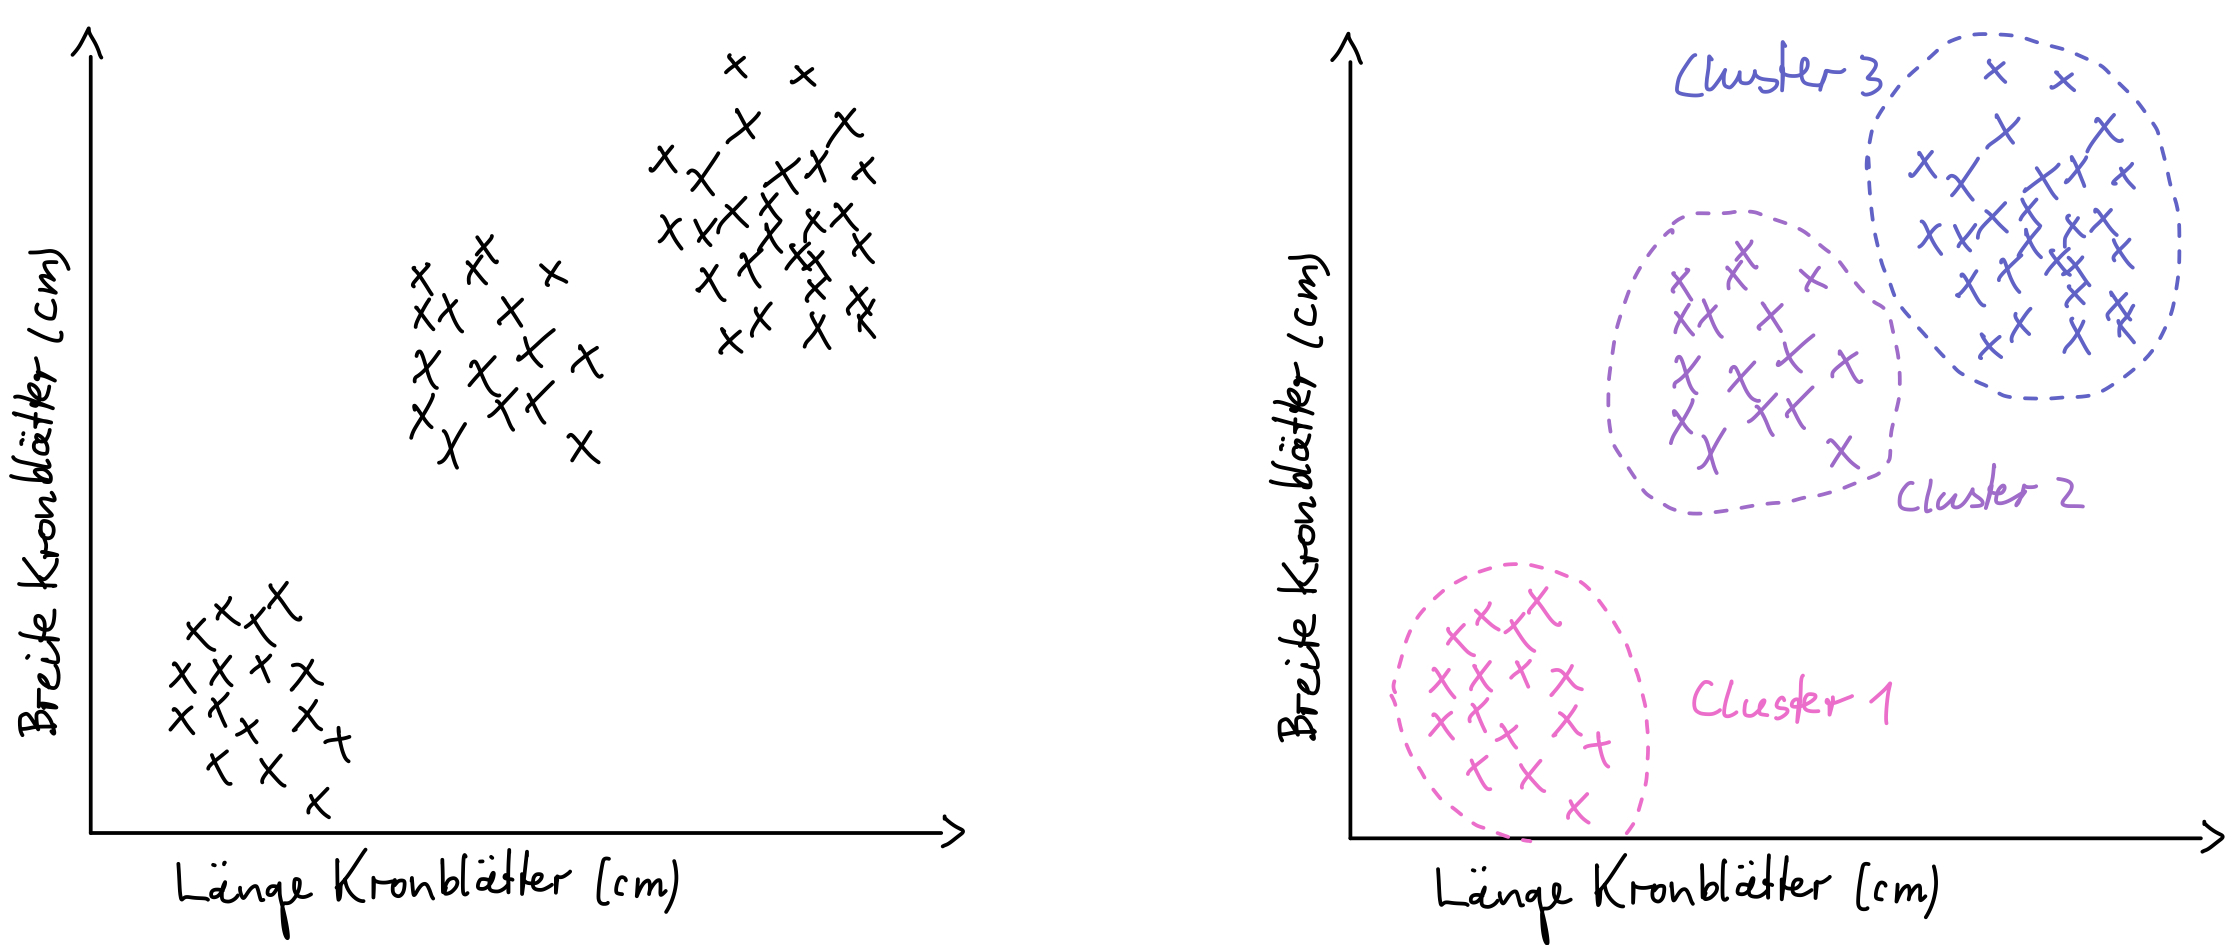